***
# ***Imports***
***

## ***Python Libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sns

## ***Dataset***

In [2]:
df = pd.read_csv("/workspaces/Anomoly-detection/diabetes.csv")

***
# ***Exploratory Data Analysis***
***

## ***Data Overview***

***Dataset Properties***

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***Missing Value Check***

In [7]:
print("The number of missing values for each column: \n", df.isnull().sum())

The number of missing values for each column: 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


***Duplicates Check***

In [8]:
print("The number of duplicates in the dataset is: ", df.duplicated().sum())

The number of duplicates in the dataset is:  0


## ***Visualizations***

### ***Univariate Analysis***

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


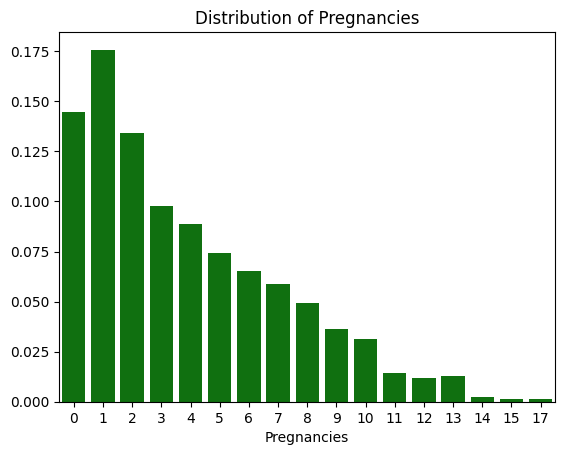

In [9]:
# Distribution of the 'Pregnancies' column within our dataset, showing the propotion  for each category in the column
proportions = (df['Pregnancies'].value_counts(normalize=True))

# Create a bar plot using the proportions
sns.barplot(x=proportions.index, y=proportions.values, color='g')
plt.title('Distribution of Pregnancies')
plt.xlabel('Pregnancies')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Glucose')

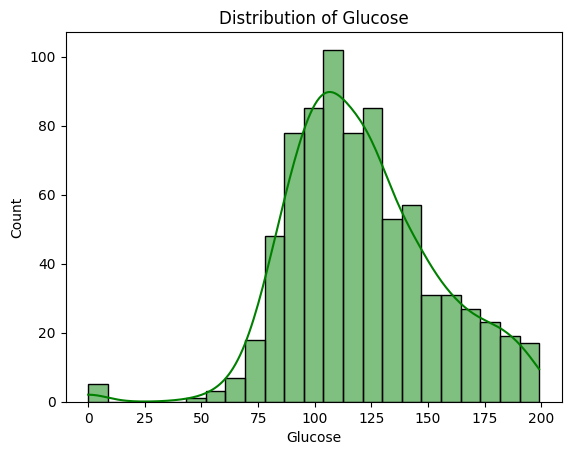

In [10]:
sns.histplot(data=df, x=df["Glucose"], kde=True, color='g')
plt.title('Distribution of Glucose')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of BloodPressure')

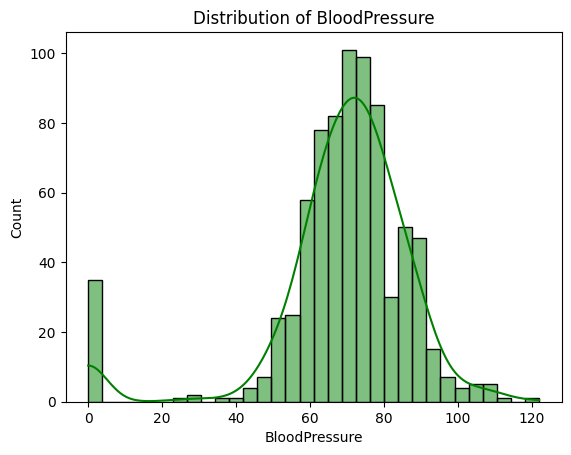

In [11]:
sns.histplot(data=df, x="BloodPressure", kde=True, color="g")
plt.title('Distribution of BloodPressure')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of SkinThickness')

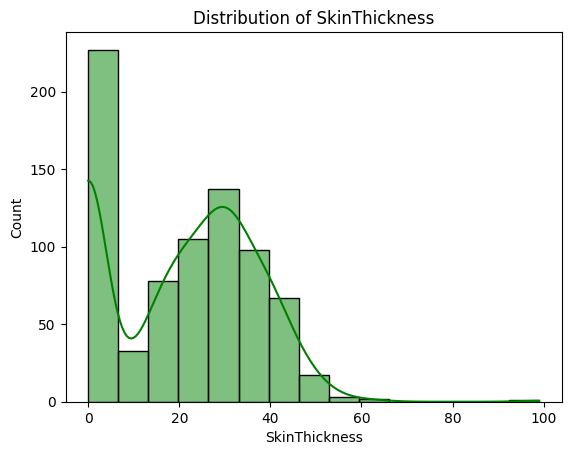

In [12]:
sns.histplot(data=df, x="SkinThickness", kde=True, color="g")
plt.title('Distribution of SkinThickness')


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Insulin')

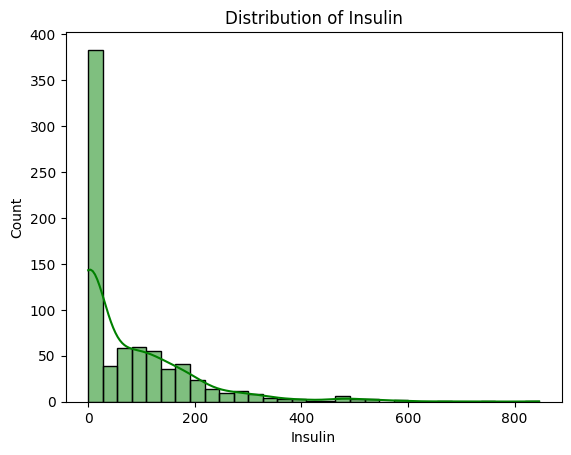

In [13]:
sns.histplot(data=df, x="Insulin", kde=True, color="g")
plt.title('Distribution of Insulin')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of BMI')

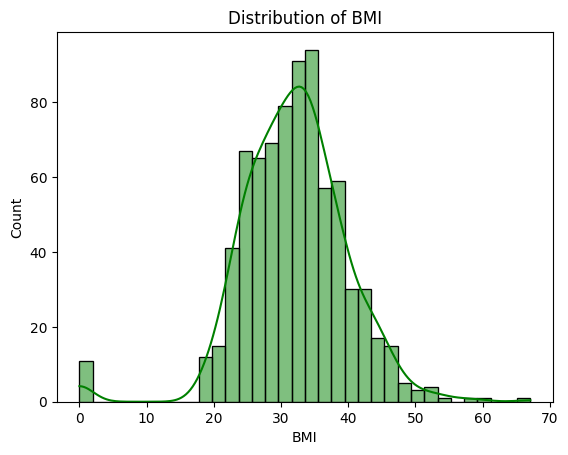

In [14]:
sns.histplot(data=df, x="BMI", kde=True, color="g")
plt.title('Distribution of BMI')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of DiabetesPedigreeFunction')

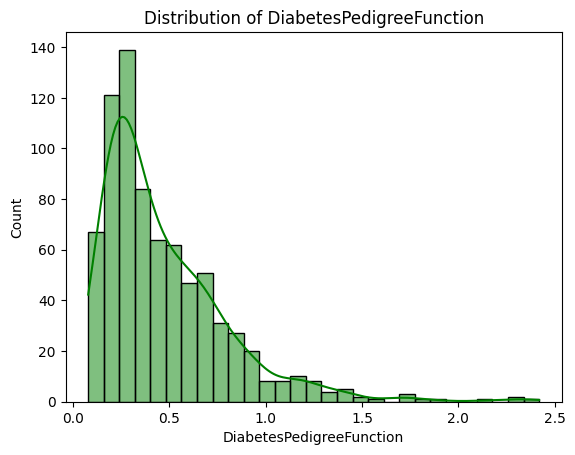

In [15]:
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, color="g")
plt.title('Distribution of DiabetesPedigreeFunction')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Age')

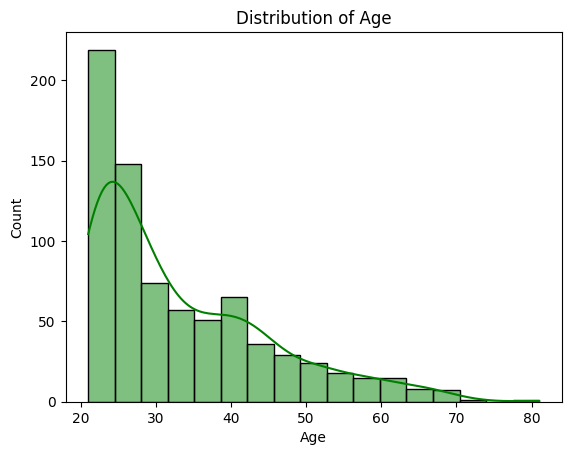

In [16]:
sns.histplot(data=df, x="Age", kde=True, color="g")
plt.title('Distribution of Age')

### ***Bivariate Analysis***

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Glucose VS Blood Pressure')

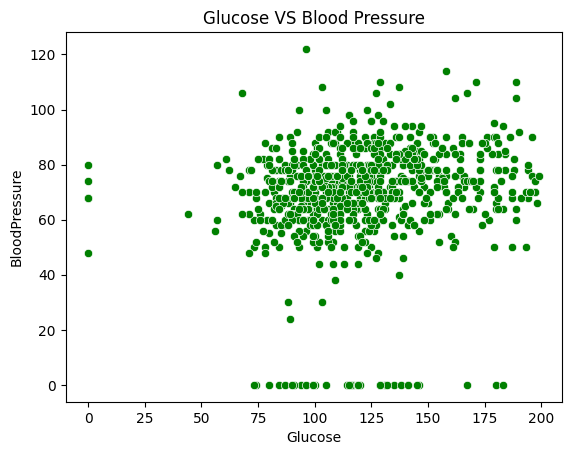

In [17]:
sns.scatterplot(x = df["Glucose"], y = df["BloodPressure"], color='g')
plt.title('Glucose VS Blood Pressure')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Glucose VS Blood Pressure')

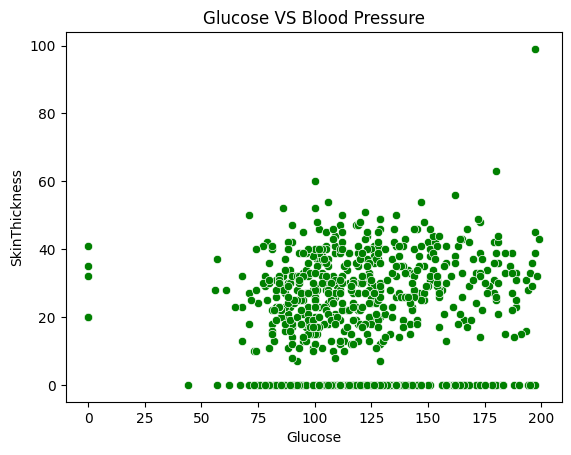

In [18]:
sns.scatterplot(x = df["Glucose"], y = df["SkinThickness"], color='g')
plt.title('Glucose VS Blood Pressure')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Glucose VS Insulin')

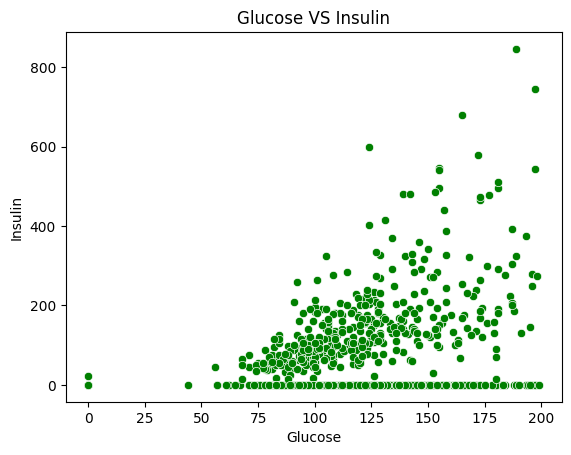

In [19]:
sns.scatterplot(x = df["Glucose"], y = df["Insulin"], color='g')
plt.title('Glucose VS Insulin')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Glucose VS BMI')

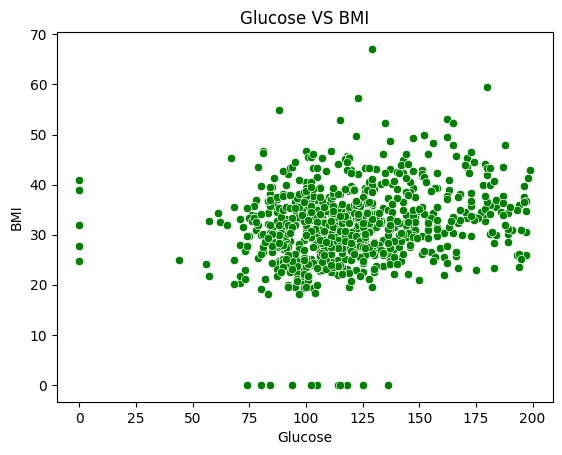

In [20]:
sns.scatterplot(x = df["Glucose"], y = df["BMI"], color='g')
plt.title('Glucose VS BMI')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Glucose VS Diabetes Pedigree Function')

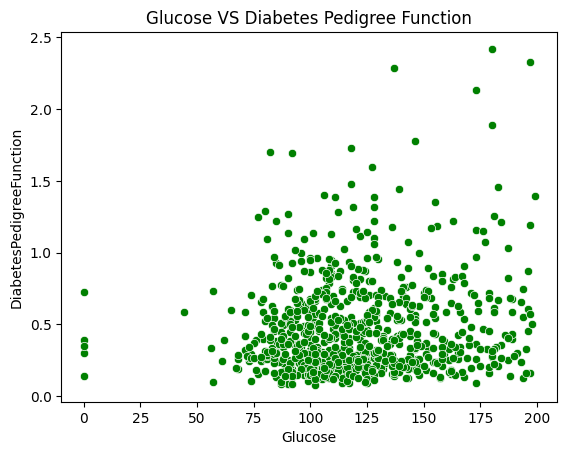

In [21]:
sns.scatterplot(x = df["Glucose"], y = df["DiabetesPedigreeFunction"], color='g')
plt.title('Glucose VS Diabetes Pedigree Function')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


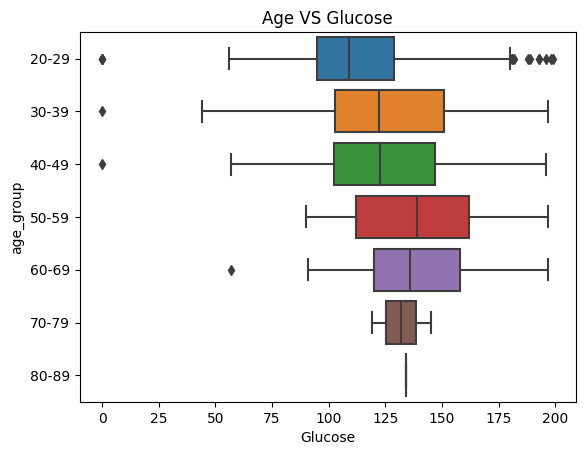

In [22]:
# Define Age group bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Create a new column 'age_group' in the DataFrame
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

sns.boxplot(y=df["age_group"], x=df["Glucose"])
plt.title('Age VS Glucose')
plt.show()

In [23]:
del df['age_group']

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Distribution of Pregnancies')

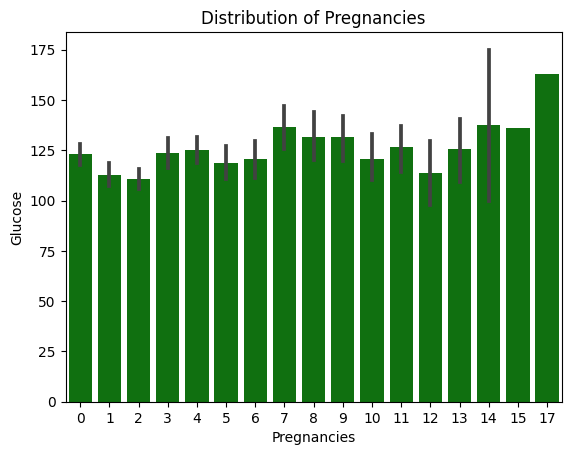

In [24]:
sns.barplot(x=df['Pregnancies'], y=df['Glucose'], color='g')
plt.title('Distribution of Pregnancies')

### ***Multivariate Analysis***


In [25]:
df = df.iloc[:, :-1]
sns.pairplot(data=df, height=3)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

<Axes: >

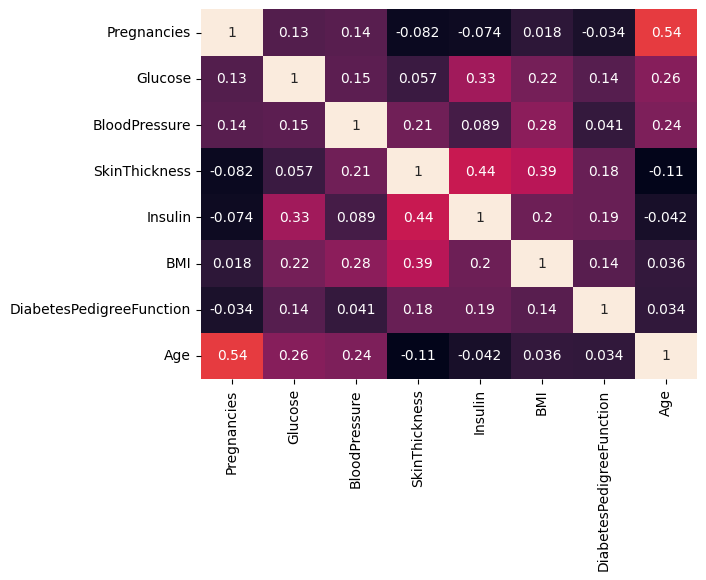

In [ ]:
sns.heatmap(data=df.corr(), annot=True, cbar=False )

***
# ***Data Preprocessing***
***

***Imputing The Zero Values***

In [ ]:
def Imputer(data):
    columns = data.columns
    for column in columns:
        if column != 'Pregnancies':
            data[column] = data[column].replace(0, data[column].mean())

    return data

In [ ]:
Imputer(df)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [ ]:
del df['Pregnancies']

In [ ]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


***Dimensionality Reduction***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, :]

# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


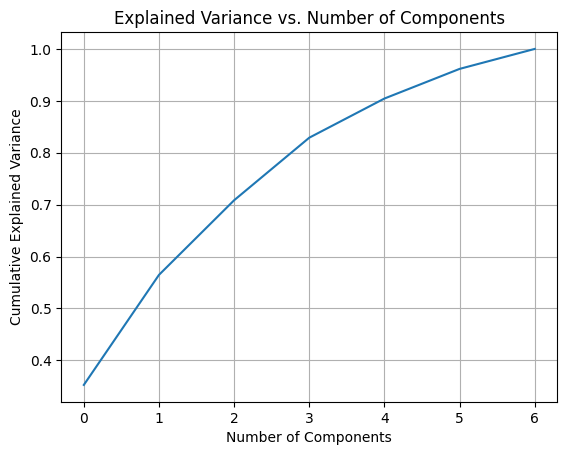

In [ ]:
pca = PCA()  # Limit to the first 10 components for visualization
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_


plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [ ]:
df_reduced = pd.DataFrame(X_scaled, columns=X.columns)
del df_reduced['Age']
df_reduced.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415
1,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567
2,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638


***
# ***Modelling***
***

 ***The Model***

In [ ]:
model = KMeans(n_clusters=2, random_state=42, n_init="auto")

***Training The Model and Plotting the Clusters***

Cluster Centroids:
 [[0.3832605  0.46324142]
 [0.71741459 0.54586395]]


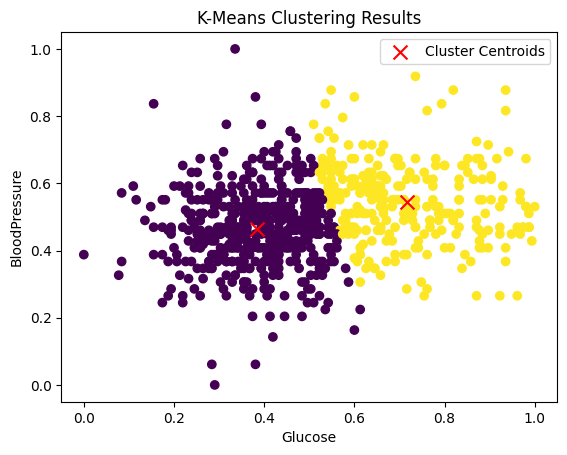

Cluster Centroids:
 [[0.390791   0.20108631]
 [0.73680053 0.23878914]]


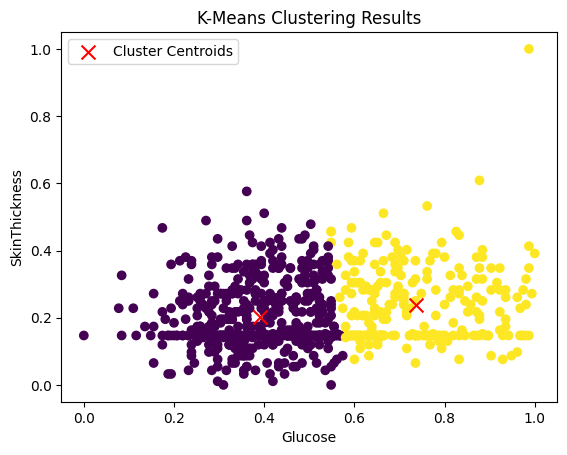

Cluster Centroids:
 [[0.72468175 0.18869153]
 [0.38611023 0.09341399]]


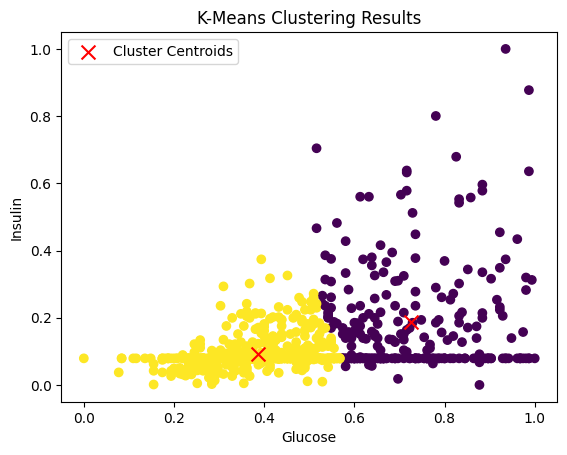

Cluster Centroids:
 [[0.72240761 0.35659549]
 [0.38728094 0.25787949]]


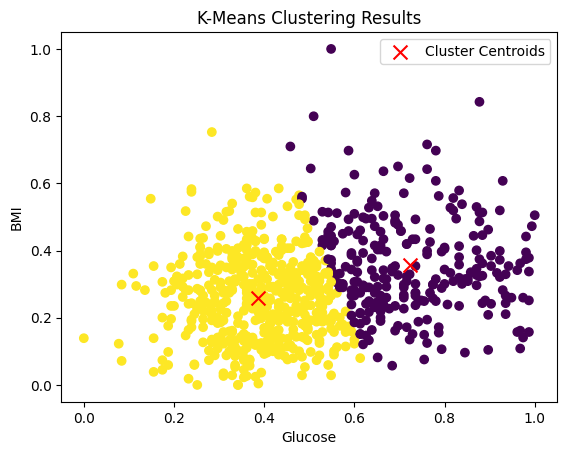

Cluster Centroids:
 [[0.38977528 0.15236636]
 [0.73335924 0.20113931]]


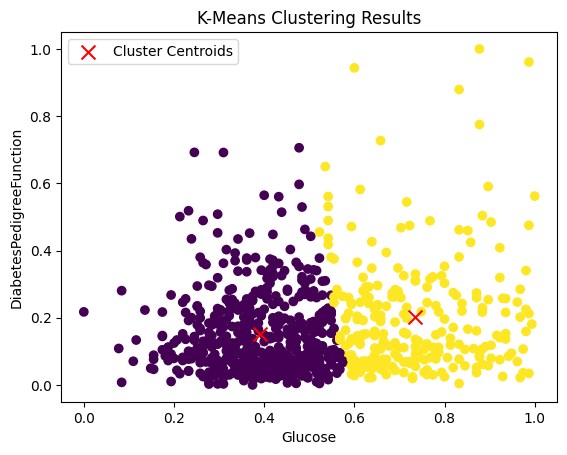

In [ ]:
# def kmeans_training(df_reduced, clustering):

wcss = {}
silhouette_scores_dict = {}
davies_bouldin_dict = {}

for column in df_reduced.columns:
    if column != "Glucose":     
        feature1 = "Glucose"
        feature2 = column

        X = df_reduced[[feature1, feature2]] 
        clustering = model.fit(X)


        labels = clustering.labels_
        centroids = clustering.cluster_centers_
        print("Cluster Centroids:\n", centroids)

        plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis')
        plt.scatter(centroids[:, X.columns.get_loc(feature1)], centroids[:, X.columns.get_loc(feature2)], marker='x', s=100, c='red', label='Cluster Centroids')
        plt.title("K-Means Clustering Results")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend()
        plt.show()   
        

        # Evalutaion metrics, view results under Model Evalaution

        wcss[f'{feature1} VS {feature2}'] = clustering.inertia_

        
        silhouette_value = silhouette_score(X, clustering.labels_)
        silhouette_scores_dict[f'{feature1} VS {feature2}'] = silhouette_value

        davies_bouldin_value = davies_bouldin_score(X, clustering.labels_)
        davies_bouldin_dict[f'{feature1} VS {feature2}'] = davies_bouldin_value


    # return


***
# ***Model Evaluation***
***

***Within Cluster Sum Of Squares***

In [ ]:
print("The wcss scores for each cluster is: \n")

for key, value in wcss.items():
    print(f'{key}: {value}')

The wcss scores for each cluster is: 

Glucose VS BloodPressure: 20.51808706654947
Glucose VS SkinThickness: 17.767751572859932
Glucose VS Insulin: 17.858619925442447
Glucose VS BMI: 23.706183196674495
Glucose VS DiabetesPedigreeFunction: 24.659453571362175


***Sihouellette Scores***

In [ ]:
print("The Sihouellette Scores for each cluster is: \n")

for key, value in silhouette_scores_dict.items():
    print(f'{key}: {value}')

The Sihouellette Scores for each cluster is: 

Glucose VS BloodPressure: 0.44736151553541886
Glucose VS SkinThickness: 0.4746590578554118
Glucose VS Insulin: 0.5182977137207753
Glucose VS BMI: 0.42585768658650597
Glucose VS DiabetesPedigreeFunction: 0.4411125227039541


In [ ]:
print("The Davies Bouldin Score for each cluster is: \n")

for key, value in davies_bouldin_dict.items():
    print(f'{key}: {value}')

The Davies Bouldin Score for each cluster is: 

Glucose VS BloodPressure: 0.8552545686750617
Glucose VS SkinThickness: 0.8053254357769875
Glucose VS Insulin: 0.7828008816362437
Glucose VS BMI: 0.9267227173036243
Glucose VS DiabetesPedigreeFunction: 0.9313776247321852


## ***Hyperparameter Tuning***

In [ ]:
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6]
}

Cluster Centroids:
 [[0.325      0.34741709]
 [0.52052738 0.42497869]
 [0.86874783 0.50420413]
 [0.47809519 0.64109105]
 [0.31097561 0.51321373]
 [0.67383513 0.58599877]]


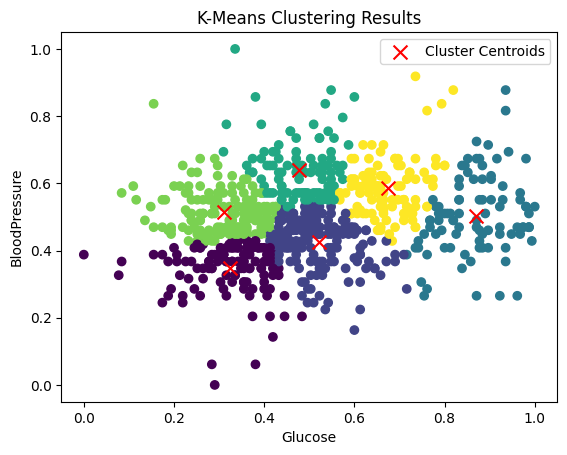

Cluster Centroids:
 [[0.4380937  0.33619818]
 [0.85663837 0.19706927]
 [0.39873851 0.13627407]
 [0.57139601 0.15791842]
 [0.25276842 0.19478524]
 [0.69991511 0.35011442]]


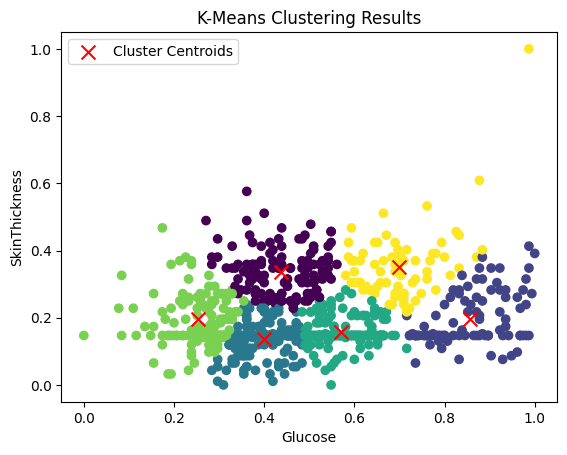

Cluster Centroids:
 [[0.44339322 0.10026766]
 [0.57772368 0.29678429]
 [0.28112424 0.07365856]
 [0.85806452 0.13900341]
 [0.7984639  0.61464057]
 [0.62251201 0.10222104]]


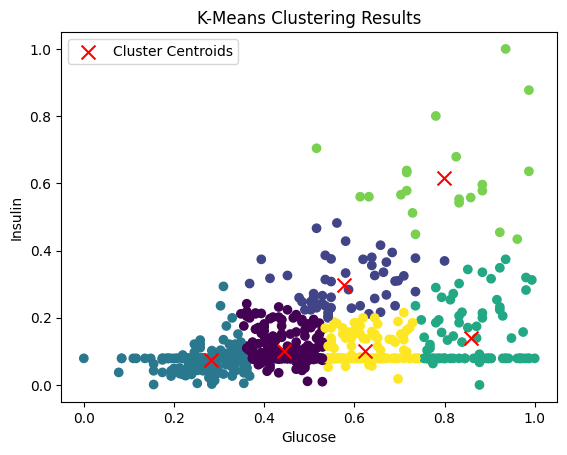

Cluster Centroids:
 [[0.42605544 0.4128698 ]
 [0.85113752 0.29645894]
 [0.38000376 0.13563837]
 [0.70146628 0.52959038]
 [0.57433324 0.24610726]
 [0.26473118 0.28105921]]


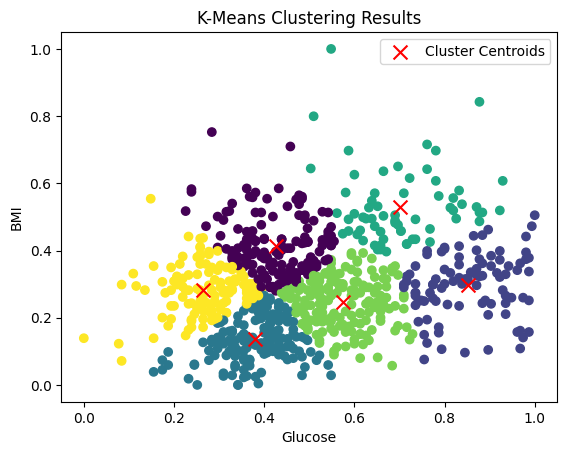

Cluster Centroids:
 [[0.61469102 0.14364975]
 [0.78580645 0.59079419]
 [0.84575989 0.15071267]
 [0.4165334  0.35242605]
 [0.44053062 0.08065839]
 [0.27403809 0.12473378]]


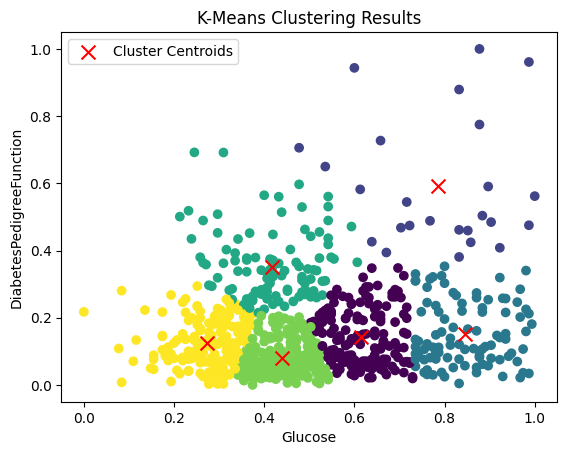

In [ ]:
for column in df_reduced.columns:
    if column != "Glucose":     
        feature1 = "Glucose"
        feature2 = column

        X = df_reduced[[feature1, feature2]]

        grid_search = GridSearchCV(KMeans(n_init=10), param_grid, cv=5)
        grid_search.fit(X)
        Tuned_params = grid_search.best_params_
        Tuned_model_1 = grid_search.best_estimator_


        labels = Tuned_model_1.labels_
        centroids = Tuned_model_1.cluster_centers_
        print("Cluster Centroids:\n", centroids)

        plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis')
        plt.scatter(centroids[:, X.columns.get_loc(feature1)], centroids[:, X.columns.get_loc(feature2)], marker='x', s=100, c='red', label='Cluster Centroids')
        plt.title("K-Means Clustering Results")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend()
        plt.show()   


Cluster Centroids:
 [[0.86805411 0.50244859]
 [0.29698572 0.48446365]
 [0.67633404 0.58766078]
 [0.51764839 0.45133131]
 [0.45941255 0.6527551 ]
 [0.36934854 0.32161754]]


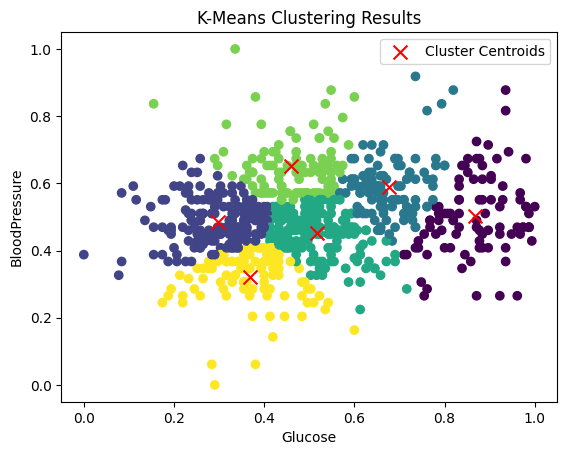

Cluster Centroids:
 [[0.36704147 0.13815735]
 [0.69179124 0.23072189]
 [0.44867357 0.34578804]
 [0.89107667 0.26328625]
 [0.52633897 0.15275938]
 [0.2383995  0.21141326]]


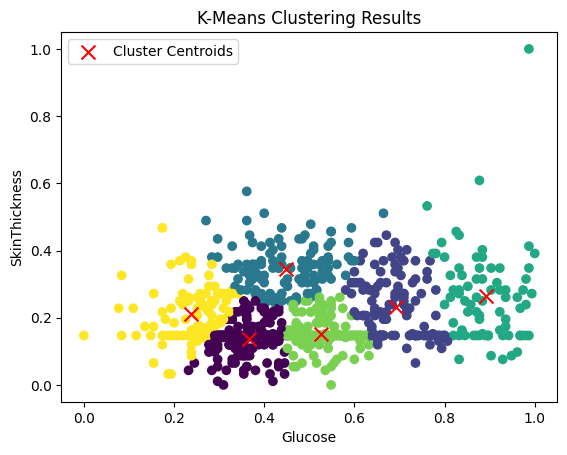

Cluster Centroids:
 [[0.26262097 0.07117908]
 [0.84420313 0.13525766]
 [0.58456221 0.28994248]
 [0.7984639  0.61464057]
 [0.58762498 0.09941764]
 [0.41555543 0.09812764]]


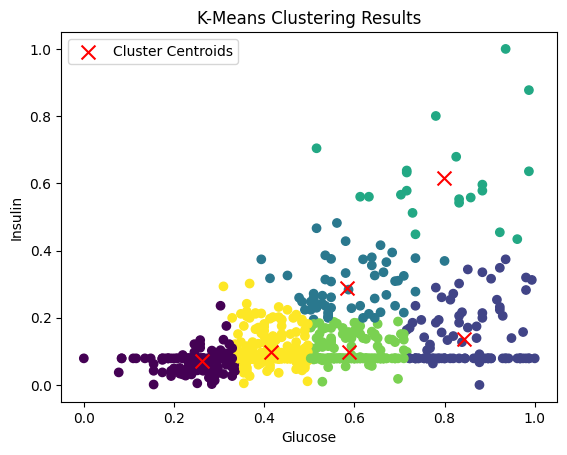

Cluster Centroids:
 [[0.55524914 0.49891009]
 [0.32756084 0.34929328]
 [0.33800344 0.14046297]
 [0.8038383  0.24661541]
 [0.85841014 0.45815074]
 [0.54288354 0.24657949]]


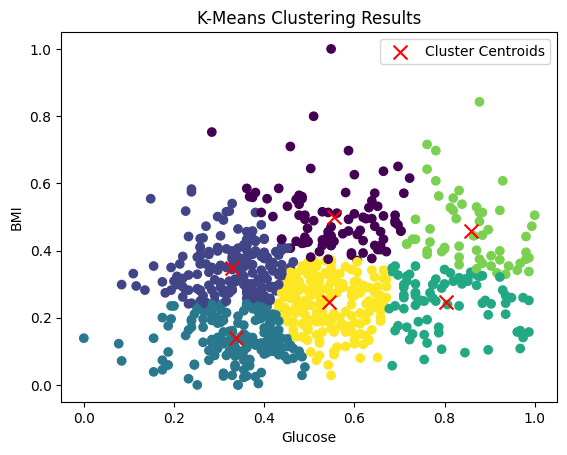

Cluster Centroids:
 [[0.45519441 0.0822618 ]
 [0.85871693 0.15463591]
 [0.40754001 0.33991094]
 [0.27908788 0.11828479]
 [0.63225806 0.14956535]
 [0.74241338 0.59779549]]


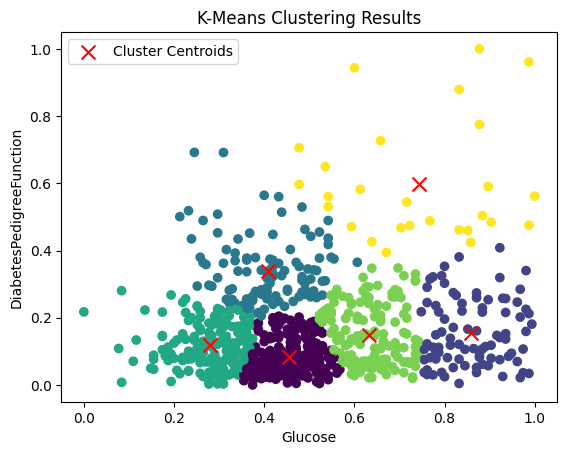

In [ ]:
for column in df_reduced.columns:
    if column != "Glucose":     
        feature1 = "Glucose"
        feature2 = column

        X = df_reduced[[feature1, feature2]]

        random_search = RandomizedSearchCV(KMeans(n_init='auto'), param_distributions=param_grid, n_iter=5, cv=5)
        random_search.fit(X)
        Tuned_params =  random_search.best_params_
        Tuned_model_2 = random_search.best_estimator_

        labels = Tuned_model_2.labels_
        centroids = Tuned_model_2.cluster_centers_
        print("Cluster Centroids:\n", centroids)

        plt.scatter(X[feature1], X[feature2], c=labels, cmap='viridis')
        plt.scatter(centroids[:, X.columns.get_loc(feature1)], centroids[:, X.columns.get_loc(feature2)], marker='x', s=100, c='red', label='Cluster Centroids')
        plt.title("K-Means Clustering Results")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend()
        plt.show()   


***
# ***Anomaly Dectection***
***

In [ ]:
# def euclidean_distance(x, y):
#     common_features = min(len(x), len(y))

#     return np.sqrt(np.sum((x[:common_features] - y[:common_features]) ** 2))


# def anomaly_detector(data, feature1, feature2, cluster_center_list):

#     data_new = data[[feature1, feature2]]
#     # centers = [cluster_center_list[: , data_new.columns.get_loc(feature1)], cluster_center_list[:, data_new.columns.get_loc(feature2)]]
#     anomalies =[]
#     midpoint = np.mean(cluster_center_list, axis=0)

#     for index, row in data_new.iterrows():
#             midpoint_distance = euclidean_distance(row, midpoint)
#             # distance = euclidean_distance(row, center)
#             if midpoint_distance > 0.43:
#                 anomalies.append(index)  # Append the index of the row, not the row itself

#     # Convert anomalies list to a DataFrame
#     anomalies_df = data_new.loc[anomalies]

#     if anomalies_df.empty:
#         print("No Anomalies Detected.")
#     else:
#         print("Anomalies Detected!")

#     # print("Cluster Centers:", centers)
#     print(midpoint)

#     # Create a scatter plot of non-anomalies in green
#     plt.scatter(data_new.loc[~data_new.index.isin(anomalies), feature1],
#                 data_new.loc[~data_new.index.isin(anomalies), feature2], c='green', label='Non-Anomalies')

#     # Create a scatter plot of anomalies in orange
#     plt.scatter(anomalies_df[feature1], anomalies_df[feature2], c='orange', label='Anomalies')

#     # Scatter plot of cluster centers (you already have this)
#     plt.scatter(cluster_center_list[0], cluster_center_list[1],
#                      marker='x', s=100, c='red', label='Cluster Centers')

#     # Add labels and legend
#     plt.title("Anomaly Detection Results")
#     plt.xlabel(feature1)
#     plt.ylabel(feature2)
#     plt.legend()
#     plt.show()

#     return 

# feature1 = "Glucose"
# feature2 = "BloodPressure"

# plot1 = anomaly_detector(df_reduced, feature1, feature2, cluster_centers)

# feature1 = "Glucose"
# feature2 = "BloodPressure"
# cluster1 = [cluster_centers[0][0], cluster_centers[0][1]]
# cluster2 = [cluster_centers[0][1], cluster_centers[1][1]]
# cluster_centers_list = [cluster1, cluster2]
# plot2 = anomaly_detector(df_reduced, feature1, feature2, cluster_centers_list)
